In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv


In [173]:
import pandas as pd
confirmed = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
deaths = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
recovered = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

In [174]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [176]:
import pandas as pd
df_confirmed = confirmed.groupby('Country/Region').max().sort_values(by='3/14/20', ascending=False)[:10]
df_confirmed

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,Zhejiang,47.8620,127.7615,444,444,549,761,1058,1423,3554,...,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790
Italy,NaN,43.0000,12.0000,0,0,0,0,0,0,0,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157
Iran,NaN,32.0000,53.0000,0,0,0,0,0,0,0,...,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729
"Korea, South",NaN,36.0000,128.0000,1,1,2,2,3,4,4,...,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086
Spain,NaN,40.0000,-4.0000,0,0,0,0,0,0,0,...,259,400,500,673,1073,1695,2277,2277,5232,6391
Germany,NaN,51.0000,9.0000,0,0,0,0,0,1,4,...,482,670,799,1040,1176,1457,1908,2078,3675,4585
France,St Martin,46.2276,149.4068,0,0,2,3,3,3,4,...,377,653,949,1126,1209,1784,2281,2281,3661,4469
Switzerland,NaN,46.8182,8.2275,0,0,0,0,0,0,0,...,114,214,268,337,374,491,652,652,1139,1359
United Kingdom,United Kingdom,55.3781,-2.3644,0,0,0,0,0,0,0,...,115,163,206,273,321,382,456,456,798,1140


In [177]:
df_deaths = deaths.groupby('Country/Region').max().sort_values(by='3/14/20', ascending=False)[:10]
df_deaths

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,Zhejiang,47.8620,127.7615,17,17,24,40,52,76,125,...,2902,2931,2959,2986,3008,3024,3046,3056,3062,3075
Italy,NaN,43.0000,12.0000,0,0,0,0,0,0,0,...,148,197,233,366,463,631,827,827,1266,1441
Iran,NaN,32.0000,53.0000,0,0,0,0,0,0,0,...,107,124,145,194,237,291,354,429,514,611
Spain,NaN,40.0000,-4.0000,0,0,0,0,0,0,0,...,3,5,10,17,28,35,54,55,133,195
France,St Martin,46.2276,149.4068,0,0,0,0,0,0,0,...,6,9,11,19,19,33,48,48,79,91
"Korea, South",NaN,36.0000,128.0000,0,0,0,0,0,0,0,...,35,42,44,50,53,54,60,66,66,72
US,"Yolo County, CA",61.3707,139.6380,0,0,0,0,0,0,0,...,10,12,15,17,17,23,29,31,37,37
Japan,NaN,36.0000,138.0000,0,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
United Kingdom,United Kingdom,55.3781,-2.3644,0,0,0,0,0,0,0,...,1,2,2,3,4,6,8,8,8,21


In [178]:
df_recovered = recovered.groupby('Country/Region').max().sort_values(by='3/14/20', ascending=False)[:10]
df_recovered

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,Zhejiang,47.8620,127.7615,28,28,31,32,42,45,80,...,40592,42033,43500,45235,46488,47743,49134,50318,51553,52960
Iran,NaN,32.0000,53.0000,0,0,0,0,0,0,0,...,739,913,1669,2134,2394,2731,2959,2959,2959,2959
Italy,NaN,43.0000,12.0000,0,0,0,0,0,0,0,...,414,523,589,622,724,724,1045,1045,1439,1966
Spain,NaN,40.0000,-4.0000,0,0,0,0,0,0,0,...,2,2,30,30,32,32,183,183,193,517
"Korea, South",NaN,36.0000,128.0000,0,0,0,0,0,0,0,...,41,135,135,118,118,247,288,333,510,510
Cruise Ship,Diamond Princess,35.4437,139.6380,0,0,0,0,0,0,0,...,10,40,40,40,40,40,325,325,325,325
Japan,NaN,36.0000,138.0000,0,0,0,0,1,1,1,...,43,46,76,76,76,101,118,118,118,118
Singapore,NaN,1.2833,103.8333,0,0,0,0,0,0,0,...,78,78,78,78,78,78,96,96,97,105
Germany,NaN,51.0000,9.0000,0,0,0,0,0,0,0,...,16,17,18,18,18,18,25,25,46,46


Transpose the Dataset****

In [179]:
dfc = df_confirmed.transpose()
dfc

Country/Region,China,Italy,Iran,"Korea, South",Spain,Germany,France,Switzerland,United Kingdom,Norway
Province/State,Zhejiang,NaN,NaN,NaN,NaN,NaN,St Martin,NaN,United Kingdom,NaN
Lat,47.862,43,32,36,40,51,46.2276,46.8182,55.3781,60.472
Long,127.761,12,53,128,-4,9,149.407,8.2275,-2.3644,8.4689
1/22/20,444,0,0,1,0,0,0,0,0,0
1/23/20,444,0,0,1,0,0,0,0,0,0
1/24/20,549,0,0,2,0,0,2,0,0,0
1/25/20,761,0,0,2,0,0,3,0,0,0
1/26/20,1058,0,0,3,0,0,3,0,0,0
1/27/20,1423,0,0,4,0,1,3,0,0,0
1/28/20,3554,0,0,4,0,4,4,0,0,0


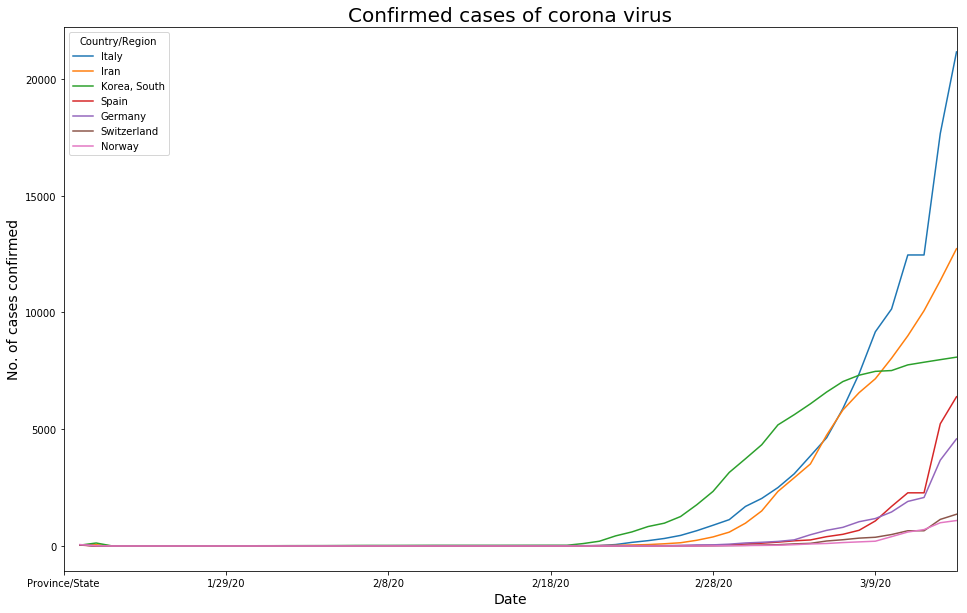

In [180]:
dfc.plot(kind='line', figsize = (16, 10))
plt.title('Confirmed cases of corona virus', fontsize=20)
plt.ylabel('No. of cases confirmed', fontsize=14)
plt.xlabel('Date', fontsize = 14)
plt.show() 

In [181]:
dfd = df_deaths.transpose()
dfd

Country/Region,China,Italy,Iran,Spain,France,"Korea, South",US,Japan,United Kingdom,Switzerland
Province/State,Zhejiang,NaN,NaN,NaN,St Martin,NaN,"Yolo County, CA",NaN,United Kingdom,NaN
Lat,47.862,43,32,40,46.2276,36,61.3707,36,55.3781,46.8182
Long,127.761,12,53,-4,149.407,128,139.638,138,-2.3644,8.2275
1/22/20,17,0,0,0,0,0,0,0,0,0
1/23/20,17,0,0,0,0,0,0,0,0,0
1/24/20,24,0,0,0,0,0,0,0,0,0
1/25/20,40,0,0,0,0,0,0,0,0,0
1/26/20,52,0,0,0,0,0,0,0,0,0
1/27/20,76,0,0,0,0,0,0,0,0,0
1/28/20,125,0,0,0,0,0,0,0,0,0


In [182]:
dfr = df_recovered.transpose()
dfr

Country/Region,China,Iran,Italy,Spain,"Korea, South",Cruise Ship,Japan,Singapore,Germany,Bahrain
Province/State,Zhejiang,NaN,NaN,NaN,NaN,Diamond Princess,NaN,NaN,NaN,NaN
Lat,47.862,32,43,40,36,35.4437,36,1.2833,51,26.0275
Long,127.761,53,12,-4,128,139.638,138,103.833,9,50.55
1/22/20,28,0,0,0,0,0,0,0,0,0
1/23/20,28,0,0,0,0,0,0,0,0,0
1/24/20,31,0,0,0,0,0,0,0,0,0
1/25/20,32,0,0,0,0,0,0,0,0,0
1/26/20,42,0,0,0,0,0,1,0,0,0
1/27/20,45,0,0,0,0,0,1,0,0,0
1/28/20,80,0,0,0,0,0,1,0,0,0


In [183]:
CONF = df_confirmed[[ '3/14/20']]
CONF.rename(columns ={'3/14/20': 'confirmedcases'}, inplace = True)
CONF

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,confirmedcases
Country/Region,
China,67790
Italy,21157
Iran,12729
"Korea, South",8086
Spain,6391
Germany,4585
France,4469
Switzerland,1359
United Kingdom,1140


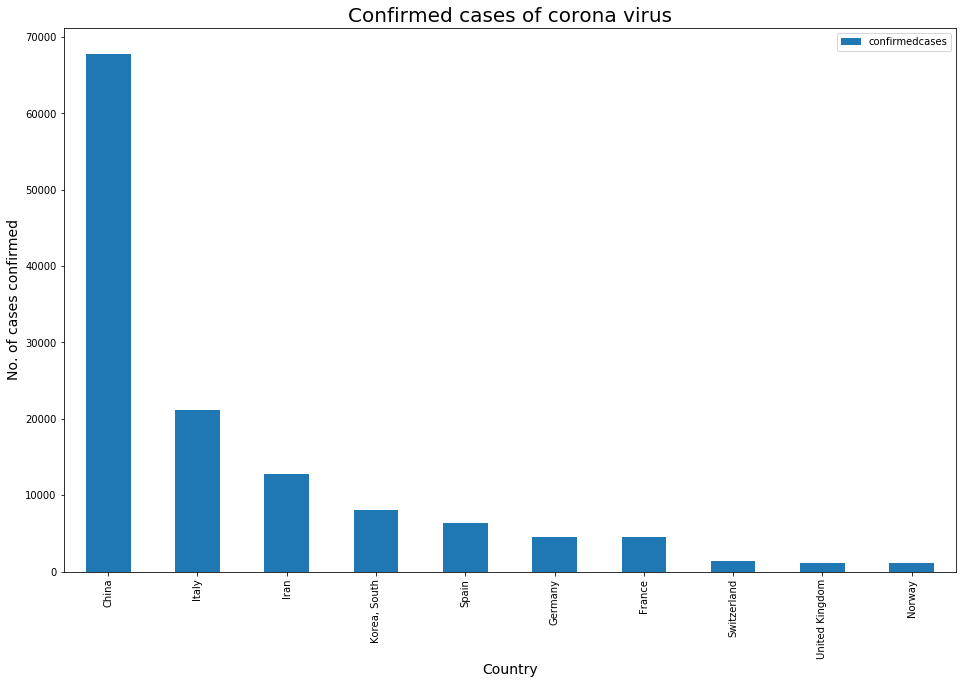

In [209]:
CONF.plot(kind='bar', figsize = (16, 10))
plt.title('Confirmed cases of corona virus', fontsize=20)
plt.ylabel('No. of cases confirmed', fontsize=14)
plt.xlabel('Country', fontsize = 14)
plt.show() 

In [185]:
DEATH = df_deaths[['3/14/20']]
DEATH.rename(columns ={'3/14/20': 'deathcases'}, inplace = True)
DEATH

,deathcases
Country/Region,
China,3075
Italy,1441
Iran,611
Spain,195
France,91
"Korea, South",72
US,37
Japan,22
United Kingdom,21


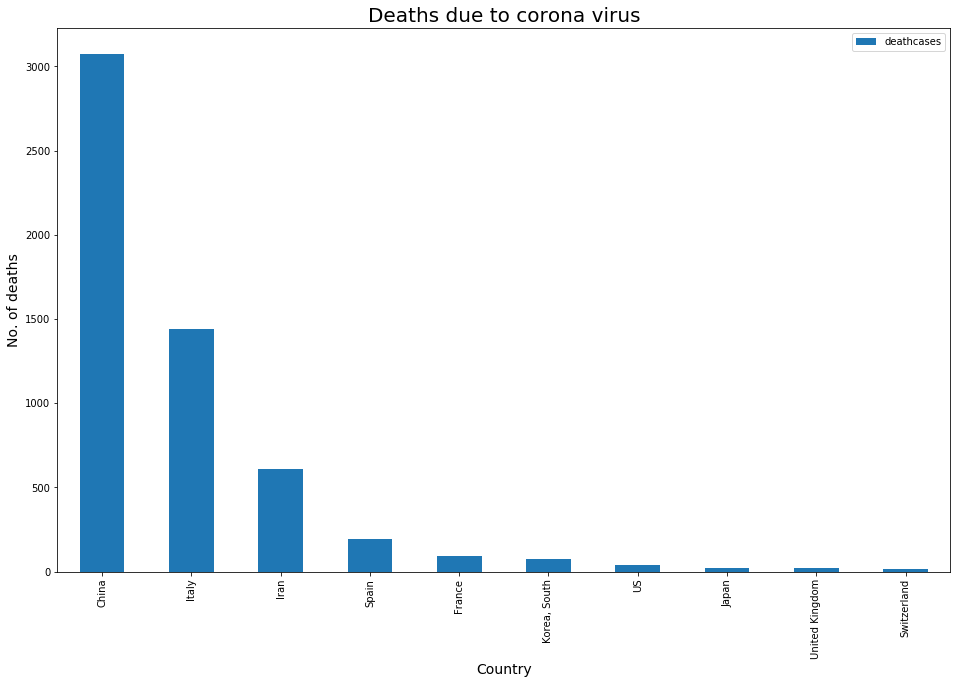

In [210]:
DEATH.plot(kind='bar', figsize = (16, 10))
plt.title('Deaths due to corona virus', fontsize=20)
plt.ylabel('No. of deaths', fontsize=14)
plt.xlabel('Country', fontsize = 14)
plt.show() 

In [187]:
RECOV = df_recovered[['3/14/20']]
RECOV.rename(columns ={'3/14/20': 'recoveredcases'}, inplace = True)
RECOV

,recoveredcases
Country/Region,
China,52960
Iran,2959
Italy,1966
Spain,517
"Korea, South",510
Cruise Ship,325
Japan,118
Singapore,105
Germany,46


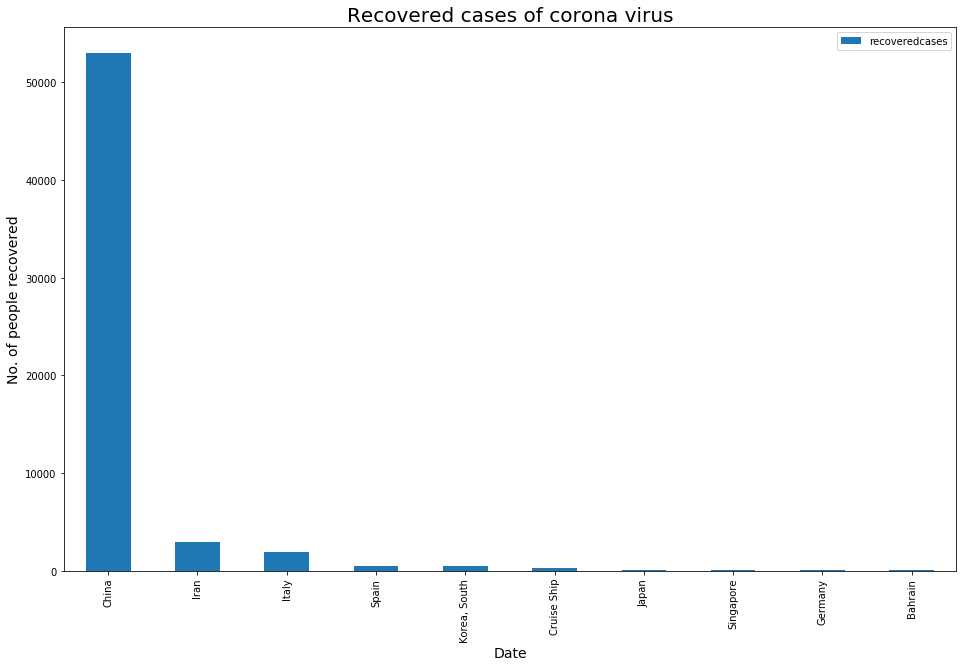

In [211]:
RECOV.plot(kind='bar', figsize = (16, 10))
plt.title('Recovered cases of corona virus', fontsize=20)
plt.ylabel('No. of people recovered', fontsize=14)
plt.xlabel('Date', fontsize = 14)
plt.show()

**CLUSTERING**

In [190]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn import metrics
%matplotlib inline

In [191]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
print('Libraries imported.')

Libraries imported.


In [192]:
X = confirmed[['Lat', 'Long', '3/14/20']]
X = StandardScaler().fit_transform(X)

In [193]:
dbscan = DBSCAN(eps = 3, min_samples =4)
model = dbscan.fit(X)

In [194]:
labels = model.labels_

In [195]:
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True



In [196]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [197]:
print('Silhoutte Coefficient: %0.3f' %metrics.silhouette_score(X, labels))

Silhoutte Coefficient: 0.913


As the Silhoutte Score nears 1 (here it is 0.913, there is only a weak overlap among the clusters. 

In [198]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:5]

array([[5.30499654e-01, 7.77949681e-01, 1.20961794e-03],
       [7.27835433e-01, 8.89146143e-01, 1.14028618e-02],
       [4.01604622e-01, 7.86464626e-01, 3.12730491e-03],
       [6.54226369e-01, 7.27610743e-01, 1.47514383e-05],
       [4.13037881e-01, 8.12510744e-01, 3.51084231e-03]])

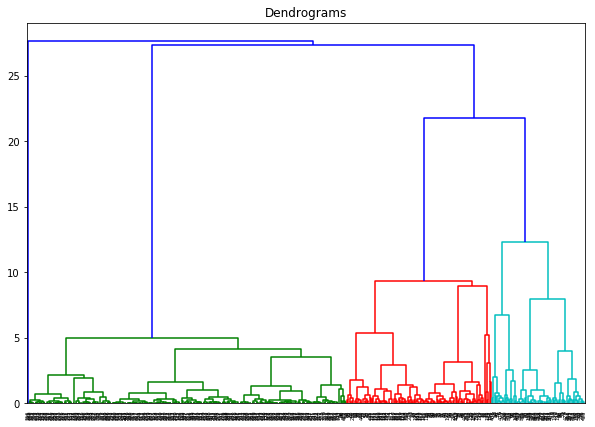

In [199]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

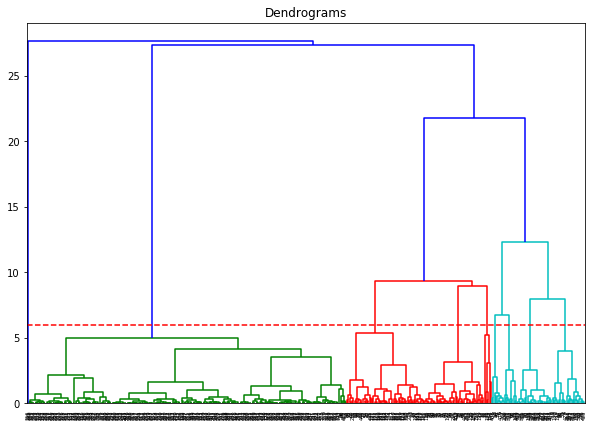

In [200]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [201]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

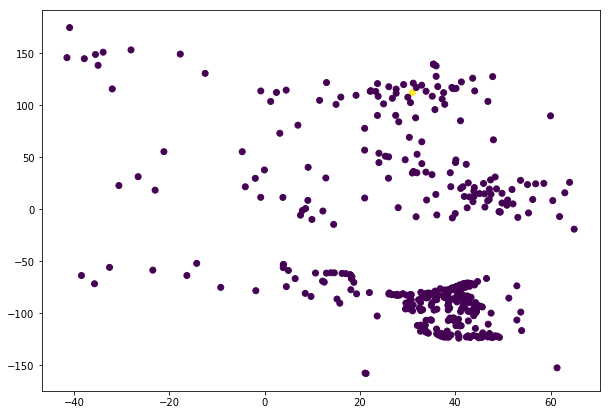

In [202]:
plt.figure(figsize=(10, 7))  
plt.scatter(confirmed['Lat'], confirmed['Long'], c=cluster.labels_) 


> **SPATIAL ANALYSIS**

In [203]:
import folium


In [204]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

wget: /opt/conda/lib/libuuid.so.1: no version information available (required by wget)
GeoJSON file downloaded!


In [205]:
world_geo = r'world_countries.json'
world_geo

'world_countries.json'

In [206]:
worldmap = folium.Map()
worldmap

**FORECASTING**